In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("reddit.csv")

In [3]:
replacers = {
    'dm': 'direct message',
    'thx': 'thanks',
    'dming': 'direct messaging',
    'dmed': 'direct messaged',
    'plz': 'please',
    'pls': 'please',
    'u': 'you',
    'asap': 'as soon as possible',
    '...': '',
    '. . .': '',
    'r': 'are',
    "what's": 'what is',
    "what're": 'what are',
    "who's": 'who is',
    "who're": 'who are',
    "where's": 'where is',
    "where're": 'where are',
    "when's": 'when is',
    "when're": 'when are',
    "how's": 'how is',
    "how're": 'how are',
    "i'm": 'i am',
    "we're": 'we are',
    "you're": 'you are',
    "they're": 'they are',
    "it's": 'it is',
    "he's": 'he is',
    "she's": 'she is',
    "that's": 'that is',
    "there's": 'there is',
    "there're": 'there are',
    "i've": 'i have',
    "we've": 'we have',
    "you've": 'you have',
    "they've": 'they have',
    "who've": 'who have',
    "would've": 'would have',
    "not've": 'not have',
    "i'll": 'i will',
    "we'll": 'we will',
    "you'll": 'you will',
    "he'll": 'he will',
    "she'll": 'she will',
    "it'll": 'it will',
    "they'll": 'they will',
    "isn't": 'is not',
    "wasn't": 'was not',
    "aren't": 'are not',
    "weren't": 'were not',
    "can't": 'can not',
    "couldn't": 'could not',
    "don't": 'do not',
    "didn't": 'did not',
    "shouldn't": 'should not',
    "wouldn't": 'would not',
    "doesn't": 'does not',
    "haven't": 'have not',
    "hasn't": 'has not',
    "hadn't": 'had not',
    "won't": 'will not',
    "you're": 'you are',
    '\s+': ' ',
    "\\n":'',
    }

In [4]:
df.head

<bound method NDFrame.head of                                                    Title Political Lean  \
0      No matter who someone is, how they look like, ...        Liberal   
1        Biden speech draws 38.2 million U.S. TV viewers        Liberal   
2                                     State of the union        Liberal   
3                  We Should Just Give Poor People Money        Liberal   
4                                      Do it for the Dew        Liberal   
...                                                  ...            ...   
12849  Ron Paul’s Spirited Defense of WikiLeaks & Fre...   Conservative   
12850  “Anarcho-capitalism, in my opinion, is a doctr...   Conservative   
12851  Mises Wiki is a wiki project dedicated to the ...   Conservative   
12852  Fireman Protection Monopoly - Is This Failed C...   Conservative   
12853      Can this Wikipedia Article be Better Written?   Conservative   

       Score      Id            Subreddit  \
0          1  t5fybt    

In [5]:
df["Political Lean"]

0             Liberal
1             Liberal
2             Liberal
3             Liberal
4             Liberal
             ...     
12849    Conservative
12850    Conservative
12851    Conservative
12852    Conservative
12853    Conservative
Name: Political Lean, Length: 12854, dtype: object

In [6]:
li = df.Title.str.replace('[...…]','').str.split().apply(lambda x: ' '.join([replacers.get(e, e) for e in x]))

C:\Users\nikhi\AppData\Local\Temp\ipykernel_20516\2646974419.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  li = df.Title.str.replace('[...…]','').str.split().apply(lambda x: ' '.join([replacers.get(e, e) for e in x]))


In [7]:
newDf = pd.DataFrame()

In [8]:
newDf["Title"] = li

In [9]:
newDf["Lean"] = df["Political Lean"]

In [10]:
newDf

,Title,Lean
0,"No matter who someone is, how they look like, ...",Liberal
1,Biden speech draws 382 million US TV viewers,Liberal
2,State of the union,Liberal
3,We Should Just Give Poor People Money,Liberal
4,Do it for the Dew,Liberal
...,...,...
12849,Ron Paul’s Spirited Defense of WikiLeaks & Fre...,Conservative
12850,"“Anarcho-capitalism, in my opinion, is a doctr...",Conservative
12851,Mises Wiki is a wiki project dedicated to the ...,Conservative
12852,Fireman Protection Monopoly - Is This Failed C...,Conservative


In [11]:
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

newDf['Subjectivity'] = df['Title'].apply(getSubjectivity)
newDf['Polarity'] = df['Title'].apply(getPolarity)

In [12]:
newDf

,Title,Lean,Subjectivity,Polarity
0,"No matter who someone is, how they look like, ...",Liberal,0.35,-0.05
1,Biden speech draws 382 million US TV viewers,Liberal,0.00,0.00
2,State of the union,Liberal,0.00,0.00
3,We Should Just Give Poor People Money,Liberal,0.60,-0.40
4,Do it for the Dew,Liberal,0.00,0.00
...,...,...,...,...
12849,Ron Paul’s Spirited Defense of WikiLeaks & Fre...,Conservative,0.90,0.45
12850,"“Anarcho-capitalism, in my opinion, is a doctr...",Conservative,0.10,-0.10
12851,Mises Wiki is a wiki project dedicated to the ...,Conservative,0.40,0.00
12852,Fireman Protection Monopoly - Is This Failed C...,Conservative,0.30,-0.50


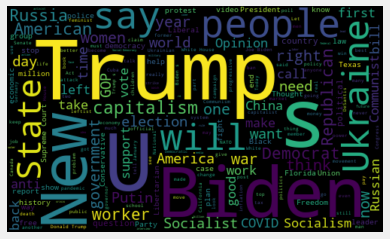

In [13]:
allWords = ' '.join([twts for twts in newDf["Title"]])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:
def getAnalysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
newDf['Analysis'] = newDf['Polarity'].apply(getAnalysis)
# Show the dataframe
newDf

,Title,Lean,Subjectivity,Polarity,Analysis
0,"No matter who someone is, how they look like, ...",Liberal,0.35,-0.05,Negative
1,Biden speech draws 382 million US TV viewers,Liberal,0.00,0.00,Neutral
2,State of the union,Liberal,0.00,0.00,Neutral
3,We Should Just Give Poor People Money,Liberal,0.60,-0.40,Negative
4,Do it for the Dew,Liberal,0.00,0.00,Neutral
...,...,...,...,...,...
12849,Ron Paul’s Spirited Defense of WikiLeaks & Fre...,Conservative,0.90,0.45,Positive
12850,"“Anarcho-capitalism, in my opinion, is a doctr...",Conservative,0.10,-0.10,Negative
12851,Mises Wiki is a wiki project dedicated to the ...,Conservative,0.40,0.00,Neutral
12852,Fireman Protection Monopoly - Is This Failed C...,Conservative,0.30,-0.50,Negative


# Plotting 
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(newDf["Polarity"][i], newDf["Subjectivity"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show()

In [16]:
newDf["Lean"].value_counts()

Liberal         8319
Conservative    4535
Name: Lean, dtype: int64

In [17]:
newDf [newDf["Analysis"] != "Neutral"]

,Title,Lean,Subjectivity,Polarity,Analysis
0,"No matter who someone is, how they look like, ...",Liberal,0.350000,-0.05,Negative
3,We Should Just Give Poor People Money,Liberal,0.600000,-0.40,Negative
6,3 House Republicans voted against a bipartisan...,Liberal,0.800000,0.40,Positive
7,"If you are bombing civilian targets, you are t...",Liberal,0.666667,-0.70,Negative
8,Every city have to government their resources ...,Liberal,0.200000,0.50,Positive
...,...,...,...,...,...
12847,What kind of `Anarchist` is Julian Assange?,Conservative,0.900000,0.60,Positive
12849,Ron Paul’s Spirited Defense of WikiLeaks & Fre...,Conservative,0.900000,0.45,Positive
12850,"“Anarcho-capitalism, in my opinion, is a doctr...",Conservative,0.100000,-0.10,Negative
12852,Fireman Protection Monopoly - Is This Failed C...,Conservative,0.300000,-0.50,Negative


In [18]:
df = newDf [newDf["Analysis"] != "Neutral"]

In [21]:
df["Analysis"].value_counts()

Positive    3824
Negative    2192
Name: Analysis, dtype: int64

In [22]:
liberal = pd.get_dummies(df["Lean"],drop_first = True)

In [23]:
liberal

,Liberal
0,1
3,1
6,1
7,1
8,1
...,...
12847,0
12849,0
12850,0
12852,0


In [24]:
df["Liberal"] = liberal

C:\Users\nikhi\AppData\Local\Temp\ipykernel_20516\1394264237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Liberal"] = liberal


In [25]:
df

,Title,Lean,Subjectivity,Polarity,Analysis,Liberal
0,"No matter who someone is, how they look like, ...",Liberal,0.350000,-0.05,Negative,1
3,We Should Just Give Poor People Money,Liberal,0.600000,-0.40,Negative,1
6,3 House Republicans voted against a bipartisan...,Liberal,0.800000,0.40,Positive,1
7,"If you are bombing civilian targets, you are t...",Liberal,0.666667,-0.70,Negative,1
8,Every city have to government their resources ...,Liberal,0.200000,0.50,Positive,1
...,...,...,...,...,...,...
12847,What kind of `Anarchist` is Julian Assange?,Conservative,0.900000,0.60,Positive,0
12849,Ron Paul’s Spirited Defense of WikiLeaks & Fre...,Conservative,0.900000,0.45,Positive,0
12850,"“Anarcho-capitalism, in my opinion, is a doctr...",Conservative,0.100000,-0.10,Negative,0
12852,Fireman Protection Monopoly - Is This Failed C...,Conservative,0.300000,-0.50,Negative,0


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df["Title"], df["Liberal"], test_size = 0.3, random_state = 42)

In [46]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df = 5, ngram_range=(1,1)).fit(x_train)

In [47]:
len(vect.get_feature_names())

1958

In [48]:
x_train_vectorized = vect.transform(x_train)

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train_vectorized, y_train)

LogisticRegression()

In [50]:
pred = model.predict(vect.transform(x_test))

In [51]:
print(pred)

[1 1 0 ... 1 1 1]


In [52]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,pred))

0.6915649318198044


In [53]:
import numpy as np
feature_names = np.array(vect.get_feature_names())

C:\Users\nikhi\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [56]:
sort = model.coef_[0].argsort()

In [57]:
feature_names[sort[:25]]

array(['antiwork', 'libertarian', 'libertarians', 'desantis', 'ronald',
       'sotu', 'bitcoin', 'poll', 'capitalism', 'ukrainians', 'confused',
       'durham', 'nov', 'sowell', 'sends', 'border', 'inflation',
       'truckers', 'ancaps', 'anarchism', 'force', 'libertarianism',
       'able', 'convoy', 'putin'], dtype='<U16')

In [58]:
feature_names[sort[-25:]]

array(['trans', 'accurate', 'far', 'white', 'feminism', 'newly',
       'governor', 'unemployment', 'cases', 'corrupt', 'georgia', 'plan',
       'issue', 'cuba', 'democracy', 'reveal', 'dems', 'senator',
       'perfect', 'coup', 'dsa', 'racist', 'workers', 'sexual', 'women'],
      dtype='<U16')